In [1]:
import gym
import gym_maze
from utils import save_frames_as_gif, get_state_rep_func
from Agents.MCAgent import MCAgent

In [2]:
env = gym.make('maze-v0')

pygame 2.0.1 (SDL 2.0.14, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
num_rows = env.observation_space.high.min() - env.observation_space.low.min() + 1
num_cols = num_rows
num_states = num_rows * num_cols
num_actions = env.action_space.n
mc_agent = MCAgent(num_states, num_actions, get_state_rep_func((5,5)))

In [4]:
num_episodes = 200
for _ in range(num_episodes):
    observation = env.reset()
    episode = mc_agent.generate_episode(env, observation)
    env.close()
    mc_agent.policy_evaluation([episode])

In [5]:
mc_agent.value_fn

array([[0.   , 0.   , 0.932, 0.   ],
       [0.   , 0.   , 0.952, 0.936],
       [0.   , 0.956, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.96 , 0.   , 0.   ],
       [0.   , 0.   , 0.988, 0.   ],
       [0.   , 0.992, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.964, 0.   , 0.   ],
       [0.984, 0.   , 0.   , 0.   ],
       [0.   , 0.996, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.968, 0.   , 0.   ],
       [0.98 , 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.972, 0.   ],
       [0.976, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ]])

Observation [0. 0.]
State 0
[0.    0.    0.932 0.   ]
Action 2
Observation [1 0]
State 1
[0.    0.    0.952 0.936]
Action 2
Observation [2 0]
State 2
[0.    0.956 0.    0.   ]
Action 1
Observation [2 1]
State 7
[0.   0.96 0.   0.  ]
Action 1
Observation [2 2]
State 12
[0.    0.964 0.    0.   ]
Action 1
Observation [2 3]
State 17
[0.    0.968 0.    0.   ]
Action 1
Observation [2 4]
State 22
[0.    0.    0.972 0.   ]
Action 2
Observation [3 4]
State 23
[0.976 0.    0.    0.   ]
Action 0
Observation [3 3]
State 18
[0.98 0.   0.   0.  ]
Action 0
Observation [3 2]
State 13
[0.984 0.    0.    0.   ]
Action 0
Observation [3 1]
State 8
[0.    0.    0.988 0.   ]
Action 2
Observation [4 1]
State 9
[0.    0.992 0.    0.   ]
Action 1
Observation [4 2]
State 14
[0.    0.996 0.    0.   ]
Action 1
Observation [4 3]
State 19
[0. 1. 0. 0.]
Action 1


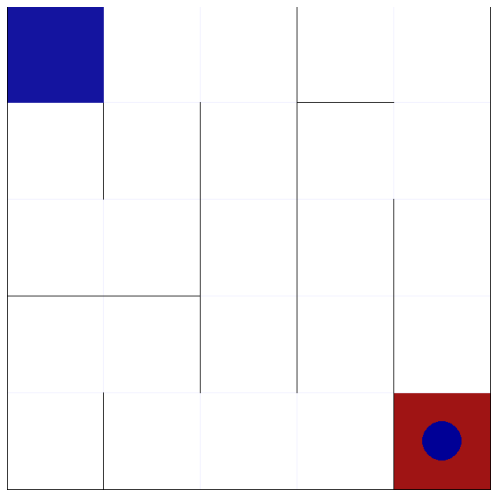

In [7]:
done = False
observation = env.reset()
frames = []
frames.append(env.render(mode='rgb_array'))
while not done:
    print("Observation", observation)
    action = mc_agent.step(observation, True)
    observation, reward, done, info  = env.step(action)
    frames.append(env.render(mode='rgb_array'))
save_frames_as_gif(frames, 15)